![lop](../../images/logo_diive1_128px.png)

# **Heatmap per year and month**
`.heatmapyearmonth()`

---
**Notebook version**: `2` (23 Mar 2025)  
**Author**: Lukas Hörtnagl (holukas@ethz.ch)

</br>

# **Description**

- Plots heatmap showing values (z) of time series as year (y) vs month (x).
- Time series must have monthly time resolution.
- This example uses 10 years of air temperature measurements, recorded at half-hourly time resolution that is resampled to monthly time resolution before plotting.
- `HeatmapDateTime` uses `HeatmapBase` (`diive.core.plotting.heatmap_base.HeatmapBase`) as base class.

</br>

# **Imports**

In [1]:
import diive as dv

import importlib.metadata
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore", UserWarning)
from diive.configs.exampledata import load_exampledata_parquet
version_diive = importlib.metadata.version("diive")
print(f"diive version: v{version_diive}")

diive version: v0.87.0


</br>

# **Docstring**

In [2]:
# help(dv.heatmapyearmonth)

</br>

# **Load example data**

In [3]:
df = load_exampledata_parquet()
series_30min = df['Tair_f']
series_30min

Loaded .parquet file F:\Sync\luhk_work\20 - CODING\21 - DIIVE\diive\diive\configs\exampledata\exampledata_PARQUET_CH-DAV_FP2022.5_2013-2022_ID20230206154316_30MIN.parquet (0.041 seconds).
    --> Detected time resolution of <30 * Minutes> / 30min 


TIMESTAMP_MIDDLE
2013-01-01 00:15:00   -1.618
2013-01-01 00:45:00   -1.630
2013-01-01 01:15:00   -1.644
2013-01-01 01:45:00   -1.657
2013-01-01 02:15:00   -0.567
                       ...  
2022-12-31 21:45:00    3.463
2022-12-31 22:15:00    5.283
2022-12-31 22:45:00    5.537
2022-12-31 23:15:00    4.963
2022-12-31 23:45:00    6.490
Freq: 30min, Name: Tair_f, Length: 175296, dtype: float64

In [4]:
series_monthly_means = series_30min.resample('1MS', label='left').mean()
series_monthly_means

TIMESTAMP_MIDDLE
2013-01-01    -4.127289
2013-02-01    -7.613169
2013-03-01    -1.802983
2013-04-01     3.542244
2013-05-01     4.567939
                ...    
2022-08-01    13.990134
2022-09-01     7.777842
2022-10-01     9.117476
2022-11-01     1.759813
2022-12-01    -1.577778
Freq: MS, Name: Tair_f, Length: 120, dtype: float64

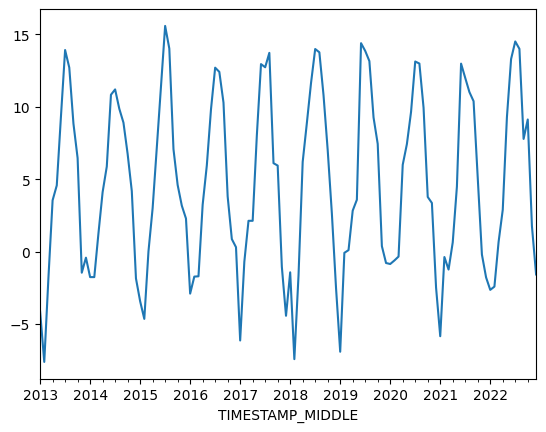

In [5]:
series_monthly_means.plot();

</br>

# (1) **Plot monthly heatmap**

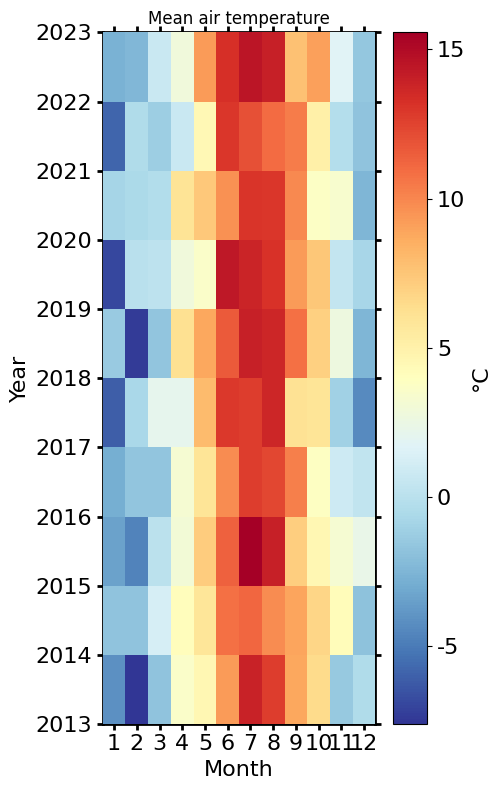

In [6]:
hm = dv.heatmapyearmonth(
    series_monthly=series_monthly_means,
    title="Mean air temperature",
    zlabel="°C",
    cb_digits_after_comma=0,
    figsize=(5, 8)
)
hm.show()

## Get ax in which the plot was generated

In [7]:
this_ax = hm.get_ax()
this_ax

<Axes: title={'center': 'Mean air temperature'}, xlabel='Month', ylabel='Year'>

## Get data that was used to create the plot

In [8]:
plot_df = hm.get_plot_data()
plot_df

x_vals,1,2,3,4,5,6,7,8,9,10,11,12
y_vals,,,,,,,,,,,,
2013,-4.127289,-7.613169,-1.802983,3.542244,4.567939,9.312250,13.911503,12.700735,8.835740,6.455432,-1.454567,-0.418102
2014,-1.758389,-1.760185,1.261626,4.103477,5.872437,10.825834,11.193386,9.861532,8.899755,6.744112,4.176977,-1.852366
2015,-3.424022,-4.642639,0.013280,2.999358,7.183376,11.388701,15.575397,14.015612,7.071502,4.600675,3.170463,2.282356
2016,-2.897780,-1.724999,-1.704113,3.230956,5.949297,9.814674,12.694337,12.403714,10.281148,3.805754,0.864235,0.304792
2017,-6.134009,-0.702418,2.126041,2.126046,8.013755,12.940166,12.722626,13.716017,6.102577,5.936708,-1.048244,-4.428223
2018,-1.429528,-7.421057,-1.648860,6.191065,8.871070,11.634234,13.981358,13.754745,10.794253,7.008341,2.641491,-2.511433
2019,-6.910549,-0.084676,0.102886,2.826584,3.579712,14.384816,13.852238,13.148321,9.259018,7.433496,0.375751,-0.786954
2020,-0.855530,-0.612688,-0.341668,5.991480,7.420426,9.644551,13.119326,12.977969,9.930872,3.772030,3.356790,-2.482149
2021,-5.839219,-0.372517,-1.237921,0.637986,4.483079,12.972103,11.986405,11.010687,10.380368,5.082464,-0.202026,-1.779989


</br>

# (2) **Plot monthly heatmap** with full args

Plotting heatmap  ...

Sanitizing timestamp ...
>>> Converting timestamp TIMESTAMP_MIDDLE to datetime ... OK
>>> All rows have timestamp TIMESTAMP_MIDDLE, no rows removed.
>>> Sorting timestamp TIMESTAMP_MIDDLE ascending ...
>>> Removing data records with duplicate indexes ... OK (no duplicates found in timestamp index)
>>> Creating continuous <MonthBegin> timestamp index for timestamp TIMESTAMP_MIDDLE between 2013-01-01 00:00:00 and 2022-12-01 00:00:00 ...
Preparing timestamp for heatmap plotting ...


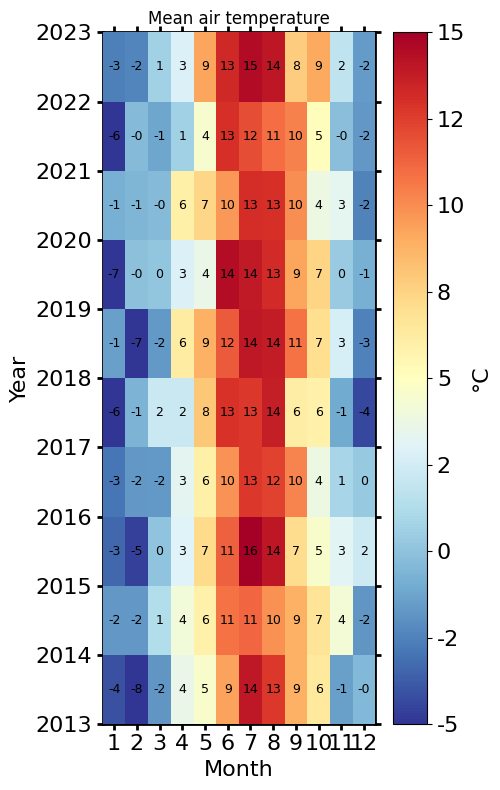

In [9]:
hm = dv.heatmapyearmonth(
    series_monthly=series_monthly_means, 
    fig=None, 
    ax=None, 
    title="Mean air temperature",
    vmin=-5, 
    vmax=15, 
    cb_digits_after_comma=0,
    cb_labelsize=16,
    axlabels_fontsize=16,
    ticks_labelsize=16,
    minyticks=3,
    maxyticks=10,
    cmap='RdYlBu_r',
    color_bad='grey',
    figsize=(5, 8),
    zlabel="°C",
    show_values=True,
    show_values_n_dec_places=0,
    verbose=True
)
hm.show()

</br>

# (3) **Plot multiple heatmaps in one figure**

## Resample and aggregate data using different methods

In [10]:
aggs = df['Tair_f'].resample('1MS', label='left').agg({'mean', 'max', np.ptp})  # numpy's ptp gives the data range
aggs

,mean,max,ptp
TIMESTAMP_MIDDLE,,,
2013-01-01,-4.127289,7.800,25.300
2013-02-01,-7.613169,5.167,23.400
2013-03-01,-1.802983,9.100,25.367
2013-04-01,3.542244,15.267,26.900
2013-05-01,4.567939,15.367,19.067
...,...,...,...
2022-08-01,13.990134,25.270,18.953
2022-09-01,7.777842,22.087,23.340
2022-10-01,9.117476,19.460,18.263


In [11]:
aggs['mean']

TIMESTAMP_MIDDLE
2013-01-01    -4.127289
2013-02-01    -7.613169
2013-03-01    -1.802983
2013-04-01     3.542244
2013-05-01     4.567939
                ...    
2022-08-01    13.990134
2022-09-01     7.777842
2022-10-01     9.117476
2022-11-01     1.759813
2022-12-01    -1.577778
Freq: MS, Name: mean, Length: 120, dtype: float64

## Plot all aggregates next to each other in same figure

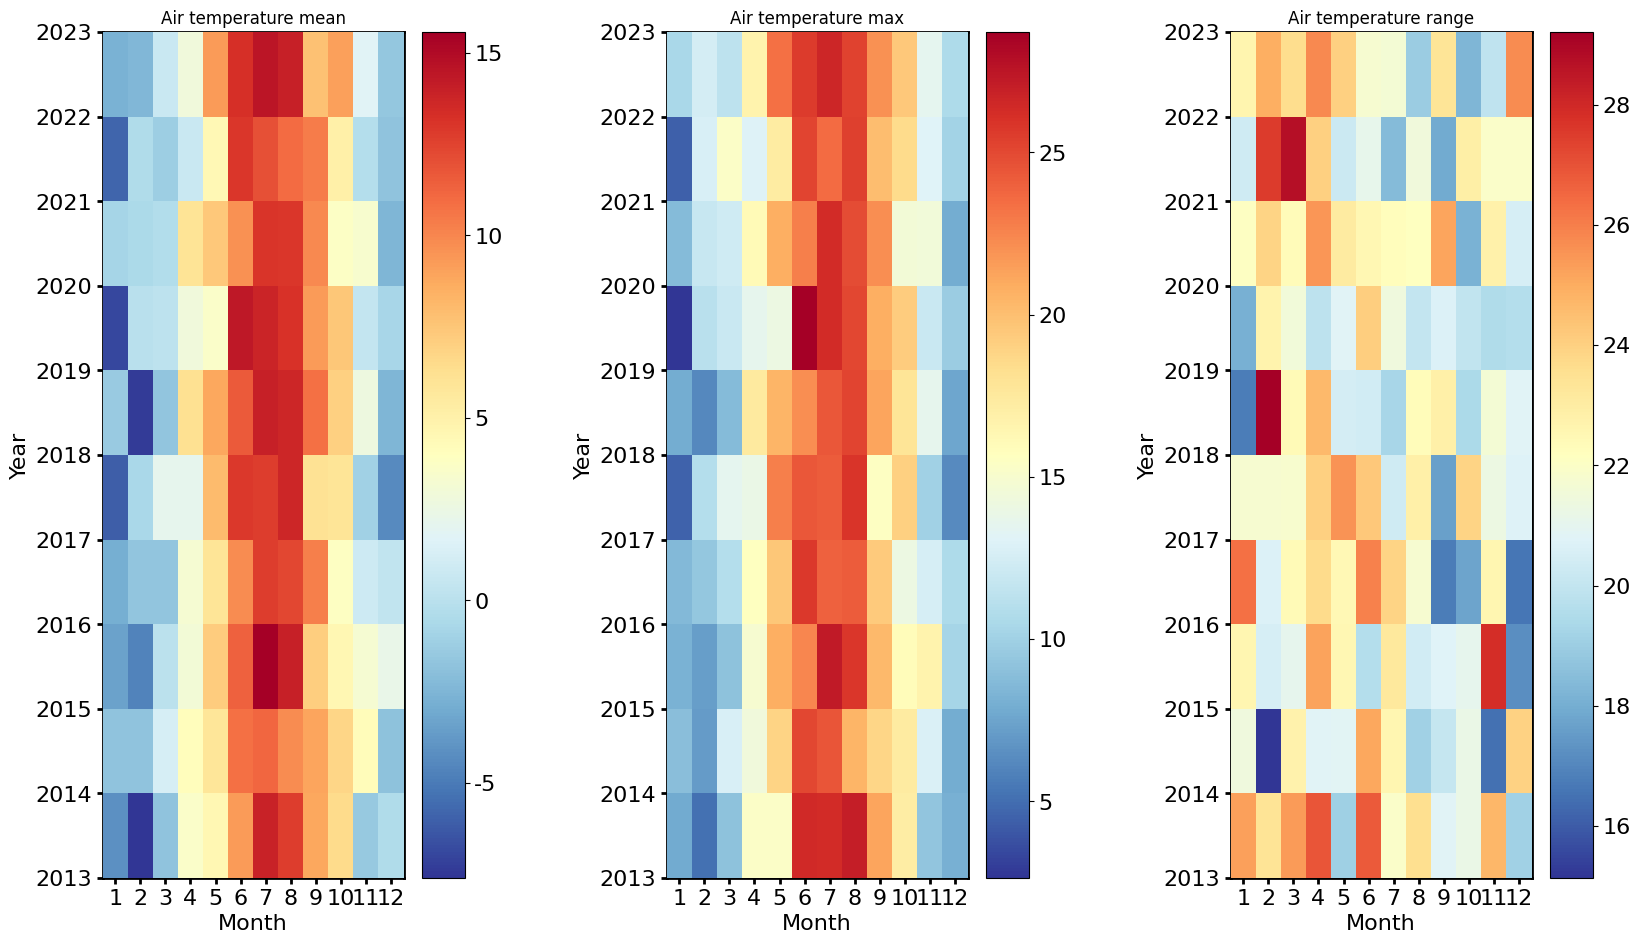

In [12]:
# Figure
fig = plt.figure(facecolor='white', figsize=(16, 9))

# Gridspec for layout
gs = gridspec.GridSpec(1, 3)  # rows, cols
gs.update(wspace=0.5, hspace=0.3, left=0.03, right=0.97, top=0.97, bottom=0.03)
ax_mean = fig.add_subplot(gs[0, 0])
ax_max = fig.add_subplot(gs[0, 1])
ax_range = fig.add_subplot(gs[0, 2])

dv.heatmapyearmonth(ax=ax_mean, series_monthly=aggs['mean'], zlabel="", cb_digits_after_comma=0).plot()
dv.heatmapyearmonth(ax=ax_max, series_monthly=aggs['max'], zlabel="", cb_digits_after_comma=0).plot()
dv.heatmapyearmonth(ax=ax_range, series_monthly=aggs['ptp'], zlabel="", cb_digits_after_comma=0).plot()

ax_mean.set_title("Air temperature mean", color='black')
ax_max.set_title("Air temperature max", color='black')
ax_range.set_title("Air temperature range", color='black')

ax_mean.tick_params(left=True, right=False, top=False, bottom=True,
                    labelleft=True, labelright=False, labeltop=False, labelbottom=True)
ax_max.tick_params(left=True, right=False, top=False, bottom=True,
                   labelleft=True, labelright=False, labeltop=False, labelbottom=True)
ax_range.tick_params(left=True, right=False, top=False, bottom=True,
                     labelleft=True, labelright=False, labeltop=False, labelbottom=True)
fig.show()

</br>

# **End of notebook**

In [13]:
dt_string = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(f"Finished {dt_string}")

Finished 2025-03-23 02:14:18
